# Life Expectancy and GDP

It is widely assumed that a country's GDP, a measure of economic growth and an indicator of wealth, can reflect on the quality of life of the inhabitants of that country. In this project, I will analyse a dataset on GDP and life expectancy from the World Health Organization and the World Bank to portray and describe the relationship between these two metrics.

In [26]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('all_data.csv')
print(data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [27]:
print('Our Data contains the following countries:', data['Country'].unique(), 
'\n and is representative of the following years: ', data['Year'].unique())

Our Data contains the following countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe'] 
 and is representative of the following years:  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Let's take a look at each of our countries individually and look at their GDP and Life Expecancy Data.

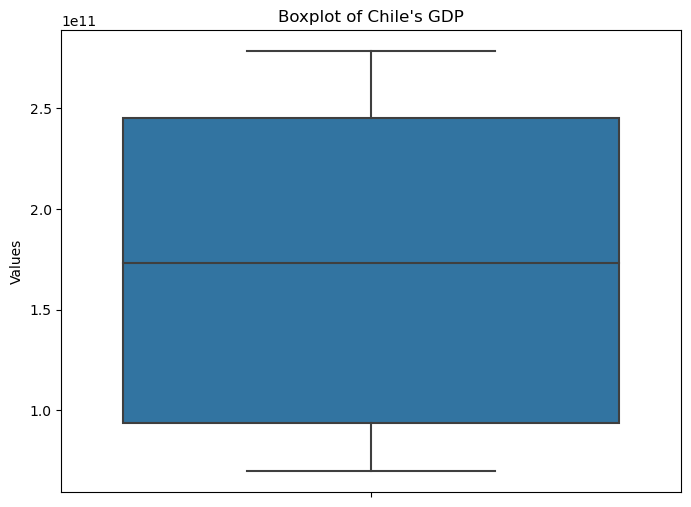

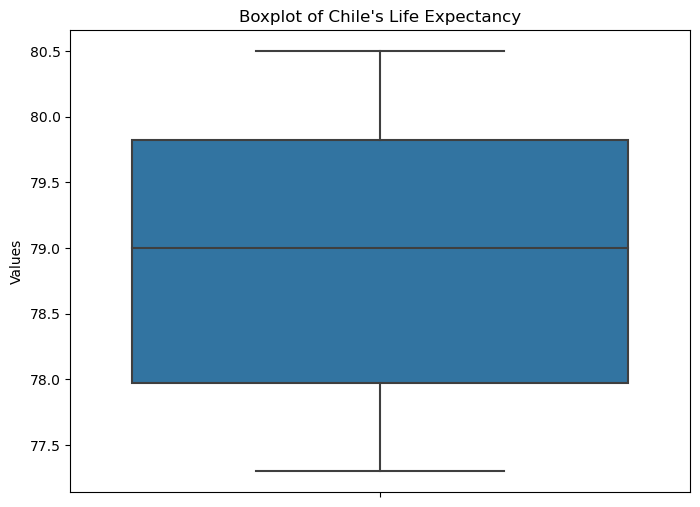

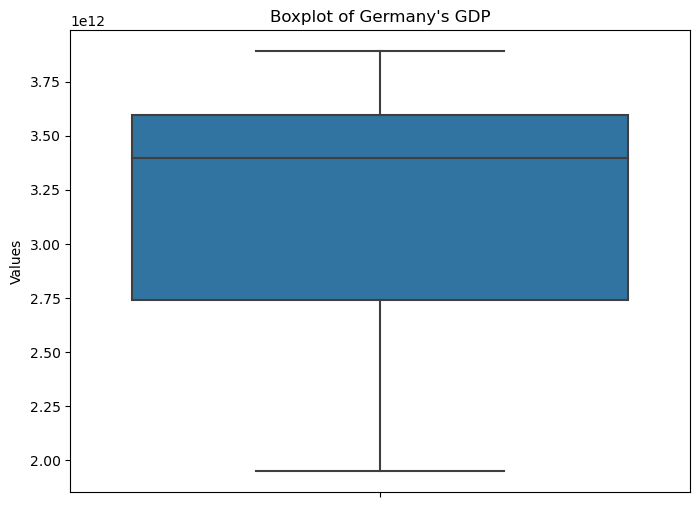

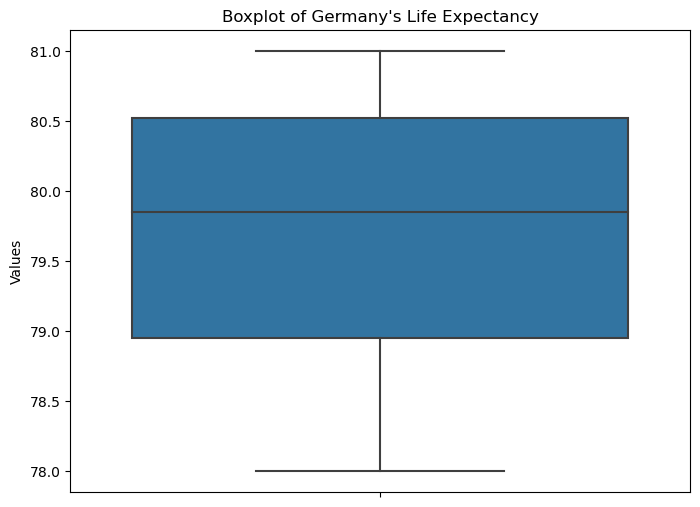

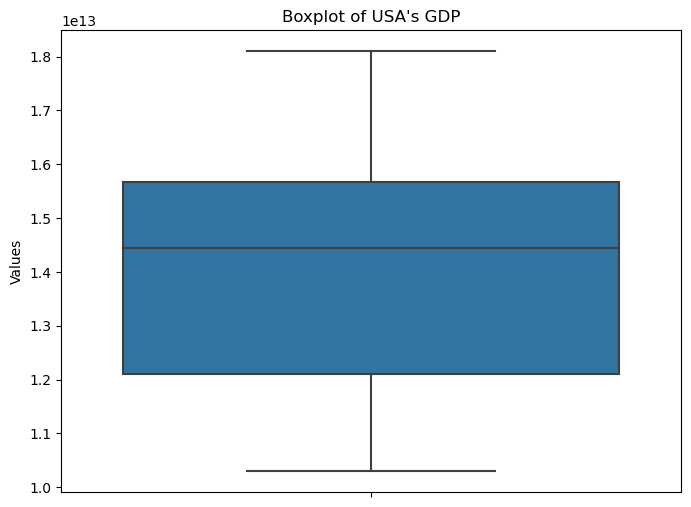

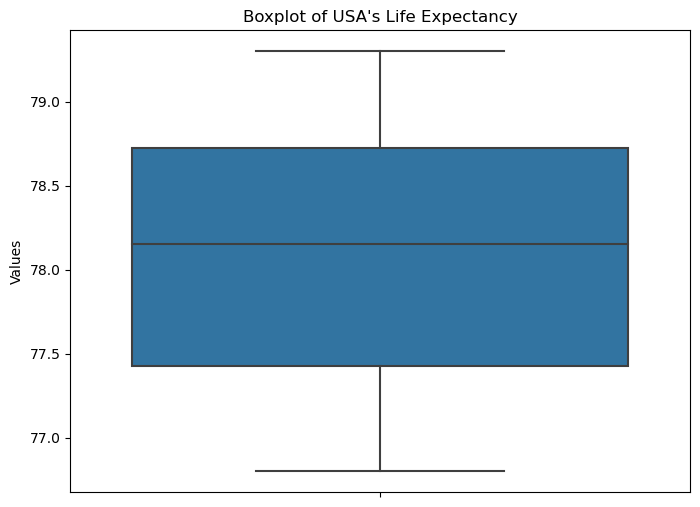

In [47]:
chile_GDP = data.loc[data['Country'] == 'Chile', 'GDP']
china_GDP = data.loc[data['Country'] == 'China', 'GDP']
germany_GDP = data.loc[data['Country'] == 'Germany', 'GDP']
mexico_GDP = data.loc[data['Country'] == 'Mexico', 'GDP']
usa_GDP = data.loc[data['Country'] == 'United States of America', 'GDP']
zimba_GDP = data.loc[data['Country'] == 'Zimbabwe', 'GDP']

y1l = data.loc[data['Country'] == 'Chile', 'Life expectancy at birth (years)']
y2l = data.loc[data['Country'] == 'China', 'Life expectancy at birth (years)']
y3l = data.loc[data['Country'] == 'Germany', 'Life expectancy at birth (years)']
y4l = data.loc[data['Country'] == 'Mexico', 'Life expectancy at birth (years)']
y5l = data.loc[data['Country'] == 'United States of America', 'Life expectancy at birth (years)']
y6l = data.loc[data['Country'] == 'Zimbabwe', 'Life expectancy at birth (years)']

def box_plot(y_data, country, Metric):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=y_data)
    plt.title("Boxplot of {}'s {}".format(country, Metric))
    plt.ylabel('Values')
    plt.show()
    
box_plot(chile_GDP, 'Chile', 'GDP')
box_plot(y1l, 'Chile', 'Life Expectancy')

box_plot(germany_GDP, 'Germany', 'GDP')
box_plot(y3l, 'Germany', 'Life Expectancy')

box_plot(usa_GDP, 'USA', 'GDP')
box_plot(y5l, 'USA', 'Life Expectancy')

By simply looking at Chile, Germany, and the US as an example, we can see that our data varies considerably. Over the 15 years, the three countries have experienced significant changes to their GDP and their population's Life Expectancy. We now need to look at the way these numbers have changed overtime and how they relate to each other.

One thing we can notice right away is how the US has a largely higher GDP than the other two countries, on average, yet doesn't have the highest Life Expectancy.

Let's then take a look at the GDP growth patterns in each of these countries.

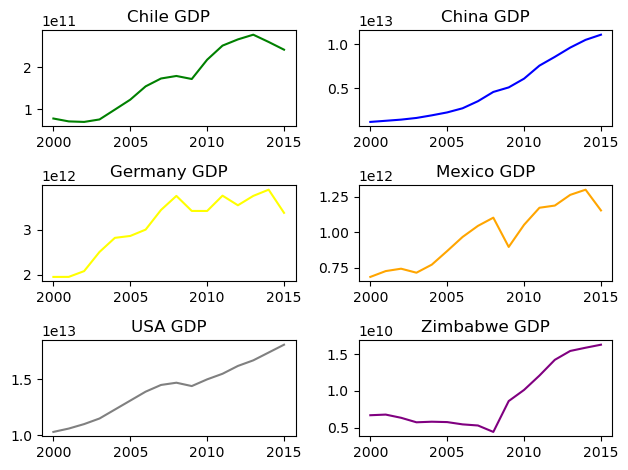

<Figure size 640x480 with 0 Axes>

In [29]:
xx = [x for x in range(2000,2016)]

fig = plt.figure()

plt.subplot(3, 2, 1)
plt.plot(xx, chile_GDP, color='green')
plt.title('Chile GDP')

plt.subplot(3, 2, 2)
plt.plot(xx, china_GDP, color='blue')
plt.title('China GDP')

plt.subplot(3, 2, 3)
plt.plot(xx, germany_GDP, color='yellow')
plt.title('Germany GDP')

plt.subplot(3, 2, 4)
plt.plot(xx, mexico_GDP, color='orange')
plt.title('Mexico GDP')

plt.subplot(3, 2, 5)
plt.plot(xx, usa_GDP, color='gray')
plt.title('USA GDP')

plt.subplot(3, 2, 6)
plt.plot(xx, zimba_GDP, color='purple')
plt.title('Zimbabwe GDP')

plt.tight_layout()
plt.show()
plt.clf()

From these charts, we can see that Chile, Mexico and Germany have similar patterns, with relatively stable growth leading to the 2008 financial crash, slow but steady recovery afterwards, followed by and economic downturn in the years 2014/2015.

The US and China Display relatively smooth and continuous growth, with Chinese GDP numbers barely affected in 2008. 

Zimbabwe on the other hand seems to have been on a relative decline until the 2008 crisis, and sharply bounced back with fast paced growth. 

It would be interesting to analyse each countries individually but also compare life expectancy numbers for countries with similar patterns of growth. 

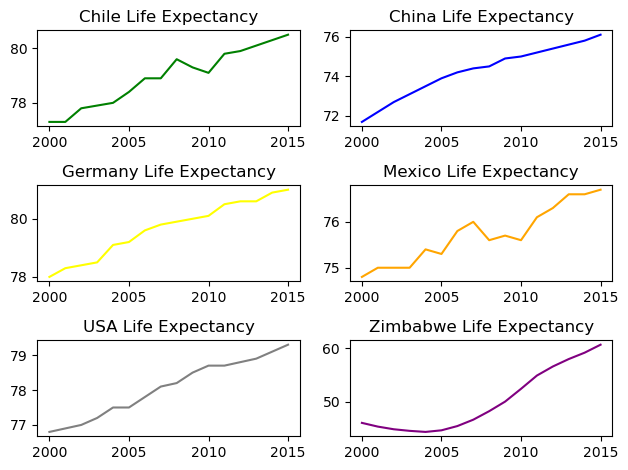

<Figure size 640x480 with 0 Axes>

In [30]:
fig = plt.figure()

plt.subplot(3, 2, 1)
plt.plot(xx, y1l, color='green')
plt.title('Chile Life Expectancy')

plt.subplot(3, 2, 2)
plt.plot(xx, y2l, color='blue')
plt.title('China Life Expectancy')

plt.subplot(3, 2, 3)
plt.plot(xx, y3l, color='yellow')
plt.title('Germany Life Expectancy')

plt.subplot(3, 2, 4)
plt.plot(xx, y4l, color='orange')
plt.title('Mexico Life Expectancy')

plt.subplot(3, 2, 5)
plt.plot(xx, y5l, color='gray')
plt.title('USA Life Expectancy')

plt.subplot(3, 2, 6)
plt.plot(xx, y6l, color='purple')
plt.title('Zimbabwe Life Expectancy')

plt.tight_layout()
plt.show()
plt.clf()

They reflect similar patterns of growth as GDP for a few countries, but not all. Let's explore more plots that can help us look at the data in a more comparative way.

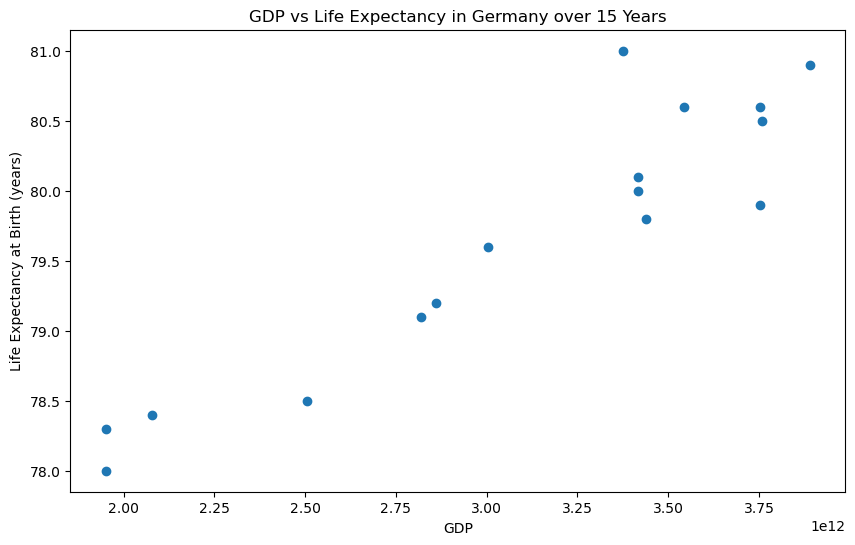

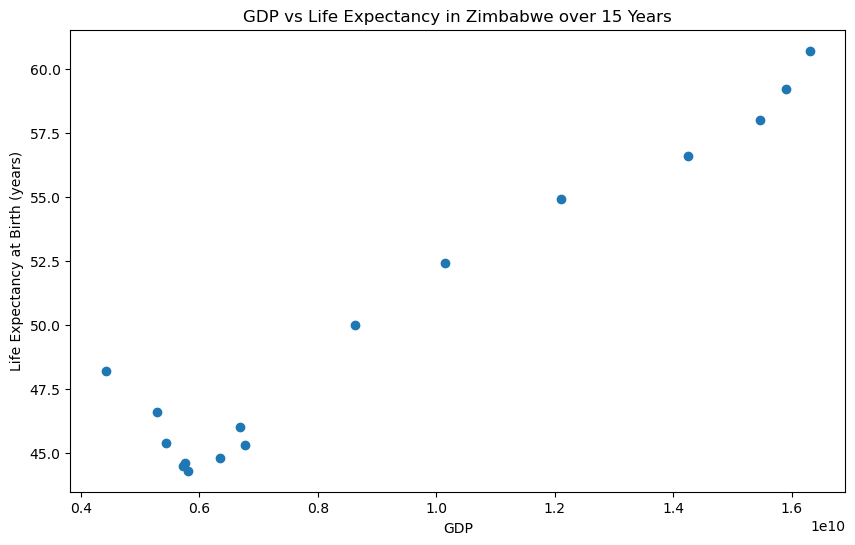

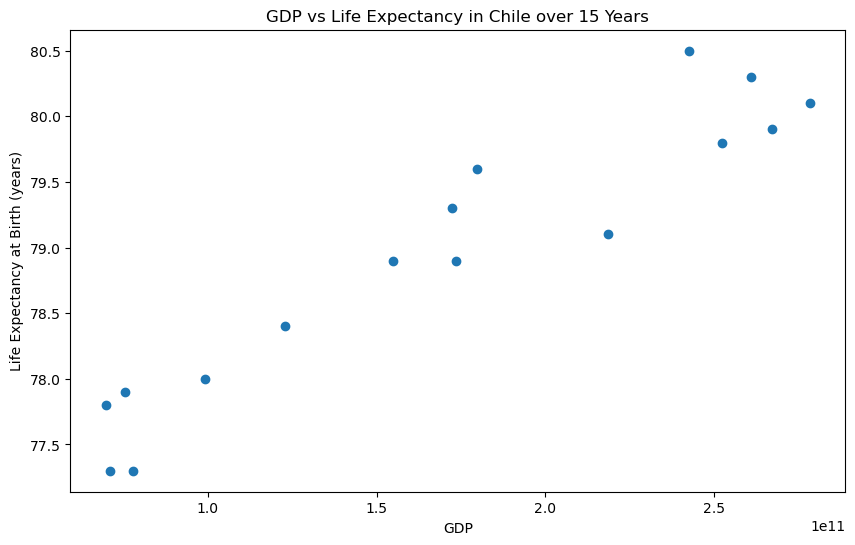

In [50]:
def make_scatter(country):
    
    x = data.loc[data['Country'] == country, 'GDP']
    y = data.loc[data['Country'] == country, 'Life expectancy at birth (years)']
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y)

    # Labels and title
    plt.xlabel('GDP')
    plt.ylabel('Life Expectancy at Birth (years)')
    plt.title('GDP vs Life Expectancy in {} over 15 Years'.format(country))

    plt.show()
    
make_scatter('Germany')
make_scatter('Zimbabwe')
make_scatter('Chile')

When we look at a scatterplot a country's GDP on the same graph as the population's Life expectancy, we can see that in the majority of our datapoints, higher GDP yields a higher life expectancy. However, we can see some outliers, and our plot doesn't account for the passage of time. 

Let's try looking at the rate of change in GDP and in life expectancy overtime..

In [32]:
data['GDP growth'] = data.groupby('Country')['GDP'].pct_change() * 100 #Creating a new column for GDP growth
data['GDP growth'] = data['GDP growth'].fillna(0) #Replacing the Nan Values

print(data[data.Country == 'China']) #Let's observe our new Column

   Country  Year  Life expectancy at birth (years)           GDP  GDP growth
16   China  2000                              71.7  1.211350e+12    0.000000
17   China  2001                              72.2  1.339400e+12   10.570851
18   China  2002                              72.7  1.470550e+12    9.791698
19   China  2003                              73.1  1.660290e+12   12.902655
20   China  2004                              73.5  1.955350e+12   17.771594
21   China  2005                              73.9  2.285970e+12   16.908482
22   China  2006                              74.2  2.752130e+12   20.392219
23   China  2007                              74.4  3.552180e+12   29.070211
24   China  2008                              74.5  4.598210e+12   29.447551
25   China  2009                              74.9  5.109950e+12   11.129113
26   China  2010                              75.0  6.100620e+12   19.387078
27   China  2011                              75.2  7.572550e+12   24.127548

In [33]:
data['Life Expectancy Growth'] = data.groupby('Country')['Life expectancy at birth (years)'].pct_change() * 1000 #Creating a new column for Life Expectancy Change
#We multiply the life expectancy growth numbers by 1000 to find values that are easier to compare to GDP growth
data['Life Expectancy Growth'] = data['Life Expectancy Growth'].fillna(0) #Replacing the Nan Values

print(data[data.Country == 'Chile']) #Let's observe our new Column

   Country  Year  Life expectancy at birth (years)           GDP  GDP growth  \
0    Chile  2000                              77.3  7.786093e+10    0.000000   
1    Chile  2001                              77.3  7.097992e+10   -8.837562   
2    Chile  2002                              77.8  6.973681e+10   -1.751358   
3    Chile  2003                              77.9  7.564346e+10    8.469915   
4    Chile  2004                              78.0  9.921039e+10   31.155282   
5    Chile  2005                              78.4  1.229650e+11   23.943668   
6    Chile  2006                              78.9  1.547880e+11   25.879722   
7    Chile  2007                              78.9  1.736060e+11   12.157273   
8    Chile  2008                              79.6  1.796380e+11    3.474534   
9    Chile  2009                              79.3  1.723890e+11   -4.035338   
10   Chile  2010                              79.1  2.185380e+11   26.770270   
11   Chile  2011                        

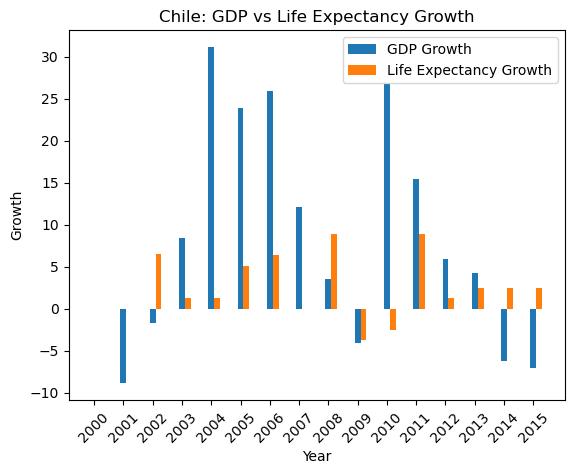

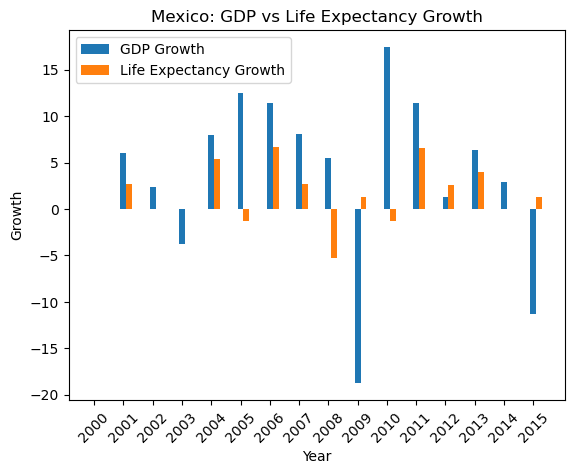

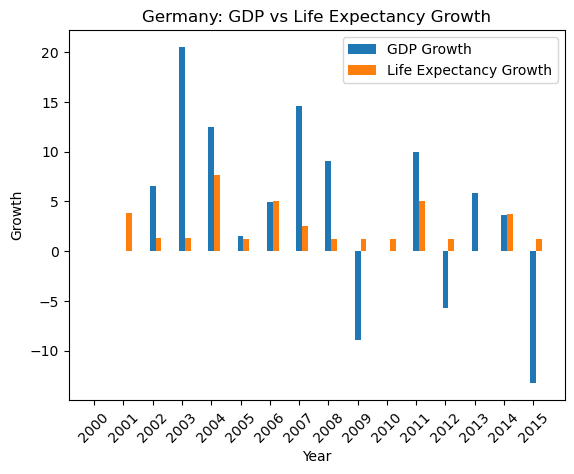

In [34]:
def growth_bar_comparison(country):

    n1 = 0  # Index for the first dataset (GDP growth)
    n2 = 1  # Index for the second dataset (Life Expectancy Growth)
    t = 2   # Total number of datasets
    d = 16  # Number of sets of bars (data points)
    w = 0.4 # Width of each bar (adjusted for better clarity)

    # Create base x-values
    x_values = [t * element for element in range(d)] 

    # Plot for GDP growth
    plt.bar([x + w*n1 for x in x_values], data.loc[data['Country'] == country, 'GDP growth'], width=w, label='GDP Growth')

    # Plot for Life Expectancy Growth
    plt.bar([x + w*n2 for x in x_values], data.loc[data['Country'] == country, 'Life Expectancy Growth'], width=w, label='Life Expectancy Growth')

    # Labels and legend
    plt.xlabel('Year')
    plt.ylabel('Growth')
    plt.title('{}: GDP vs Life Expectancy Growth'.format(country))
    plt.xticks(x_values, data.loc[data['Country'] == country, 'Year'], rotation=45)  # Set x-ticks to year values
    plt.legend()

    # Show plot
    plt.show()
    
growth_bar_comparison('Chile')
growth_bar_comparison('Mexico')
growth_bar_comparison('Germany')

What we can notice from the Chile data is that life expectancy is lagging behind GDP growth. It's only after the country experiences 1-2 years of sustained growth that life expectancy sees an increase. When GDP growth slows down and reverses, the growth of life expectancy follows with a 1 year lag. 

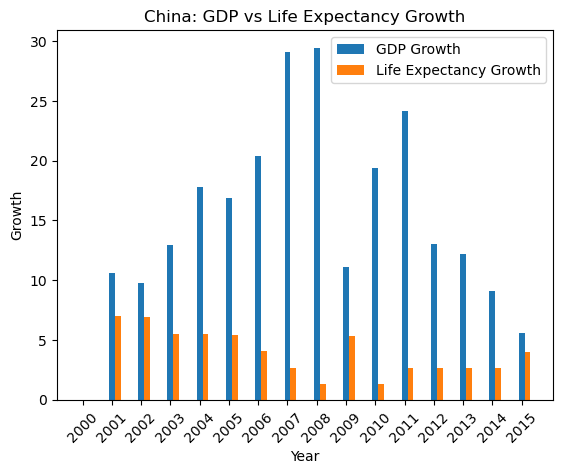

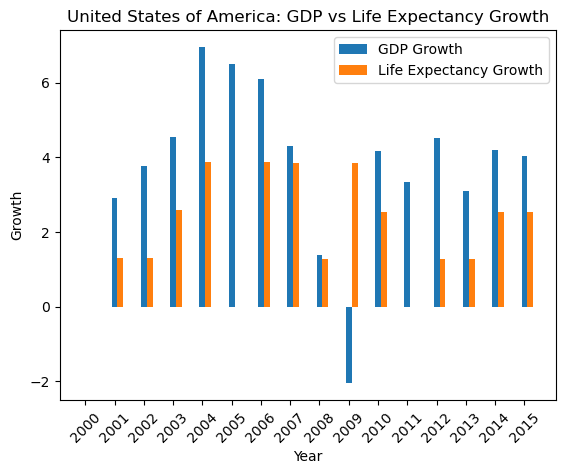

In [35]:
growth_bar_comparison('China')
growth_bar_comparison('United States of America')

In China, oddly, it seems that life expectancy drops while GDP grows, and vice versa. This could also be representative of a lag between each metric, or it can be explained through microeconomic and social phenomenons related to how the country is able to generate financial growth.

In the US, the correlation seems quite strong between both metrics, as growth in GDP is immediately observable in Life expectancy growth. 

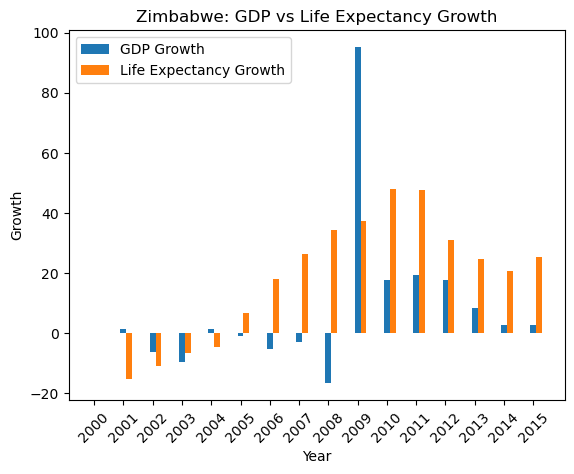

In [44]:
growth_bar_comparison('Zimbabwe')

In Zimbabwe, as soon as GDP growth became stable in 2004 and 2005, the country started experiencing growth in Life Expectancy. Even as the country's economy plunged during the 2008 crisis, the Life Expectancy kept growing at a faster and faster rate. 

# CONCLUSION

In summary, we have taken a look at Life Expectancy and GDP numbers for 6 countries over the span of 15 years. 

One conclusion we can clearly derive is that economic growth is a driving factor for the increase in Life Expectancy of a country's population. Even having a stable GDP can yield an improvement in this metric - as it might indicate a stable societal environment. Wealthier nations often have better healthcare, nutrition, and living conditions, which contribute to longer lives

What we've drawn for our specific data, however, is a follows: 

- Each country has a different rate of growth in the two variable, and some countries see immediate or slightly delayed improvements in Life Expectancy as their Economy performs better, like the US or Chile.  
- Others, like Mexico, show disaparaging data, suggesting that economic growth is not always being distributed in ways that improve public health. 
- In the Case of China, we have seen that the growth in Life Expectancy slowed down as the GDP growth accelerated, which can be caused by a series of factor, or reflect the country's choice to invest in economic infrastructure rather than improve the efficiency of healthcare systems. Nonetheless, China has shown the most consistent growth in both metrics, which is reflective of the country's stability and efforts. 
- In the Case of Germany, the country with the highest Life Expectancy, life expectancy seems to grow somewhat consistently regardless of Economic downturns, but accelereates in times of high Economic growth.
- And finally, Zimbabwe's Life Expectancy skyrocketed as the country was in Economic turmoil and finally was able to generate Economic momentum.

By comparing countries with each other, we can also see that higher GDP doesn't necessarily mean a higher Population Life Expectancy, and this can simply come down to wealth distribution, lifestyle factors, healthcare systems and infrastructure, and government spending.  